# Image Classification in Deep Learning


## What is Image Classification?
Image classification is a process where a computer learns to assign labels to images based on their content. It is a key task in computer vision with applications ranging from medical imaging to autonomous vehicles.



## Steps in Image Classification
1. **Data Collection**: Gather labeled images.
2. **Data Preprocessing**: Resize, normalize, and augment images.
3. **Model Selection**: Choose a neural network architecture (e.g., CNN).
4. **Training**: Train the model using a dataset.
5. **Evaluation**: Test the model on unseen data.
6. **Inference**: Use the trained model to classify new images.



## Key Concepts
- **Convolutional Neural Networks (CNNs)**: The most common architecture for image classification.
- **Overfitting**: When the model performs well on training data but poorly on test data.
- **Regularization Techniques**: Dropout, data augmentation, and weight decay.


In [95]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [96]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


Why is the image that started as 32 and halved twice, becomes 12 and not 8?

In [97]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)      
        x = x.view(-1, 64 * 12 * 12)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [98]:
model = CNN().to(device)

In [99]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
#         self.fc1 = nn.Linear(64 * 12 * 12, 128)
#         self.fc2 = nn.Linear(128, 10)
#         self.relu = nn.ReLU()
#         self.pool = nn.MaxPool2d(2, 2)
    
#     def forward(self, x):
        
#         x = self.relu(self.conv1(x))
#         x = self.pool(self.relu(self.conv2(x)))
#         x = x.view(-1, 64 * 12 * 12)
#         x = self.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

# model = CNN().to(device)


In [100]:

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [101]:
%%time
# Train the model
epochs = 5
for epoch in range(epochs):
    print(epoch)
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")


0
Epoch 1/5, Loss: 0.1304
1
Epoch 2/5, Loss: 0.0383
2
Epoch 3/5, Loss: 0.0240
3
Epoch 4/5, Loss: 0.0163
4
Epoch 5/5, Loss: 0.0121
CPU times: user 7min, sys: 16min 5s, total: 23min 6s
Wall time: 6min 1s


In [85]:

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


KeyboardInterrupt: 

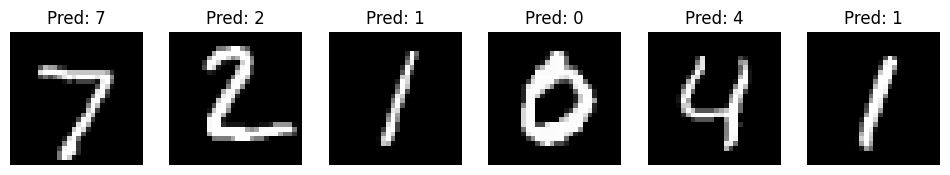

In [9]:

# Visualize some predictions
import numpy as np

dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

outputs = model(images)
_, preds = torch.max(outputs, 1)

fig, axes = plt.subplots(1, 6, figsize=(12, 4))
for i in range(6):
    axes[i].imshow(images[i].cpu().squeeze(), cmap='gray')
    axes[i].set_title(f"Pred: {preds[i].item()}")
    axes[i].axis('off')
plt.show()



## Tips for Success
1. **Use Pretrained Models**: Leverage models like ResNet and EfficientNet for better performance.
2. **Experiment with Hyperparameters**: Try different learning rates, optimizers, and architectures.
3. **Augment Data**: Increase your dataset size artificially by applying transformations like flipping and rotation.


## Next Steps
- Explore transfer learning.
- Experiment with larger datasets.
- Implement advanced architectures like ResNet or DenseNet.